In [1]:
# Preparation for programming
# Make sure to execute this cell first!
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')                  # do not show warnings
from IPython.display import display, Math, Latex
from time import *
from obspy import *
from obspy.core import read, UTCDateTime
from obspy.clients.fdsn import Client
import numpy as np
import pandas as pd
from os import path
import matplotlib.pylab as plt
from obspy.signal.filter import lowpass
from matplotlib.mlab import detrend
from obspy.signal.invsim import cosine_taper 
from mpl_toolkits.basemap import Basemap
from obspy.imaging.beachball import beach
plt.style.use('ggplot')

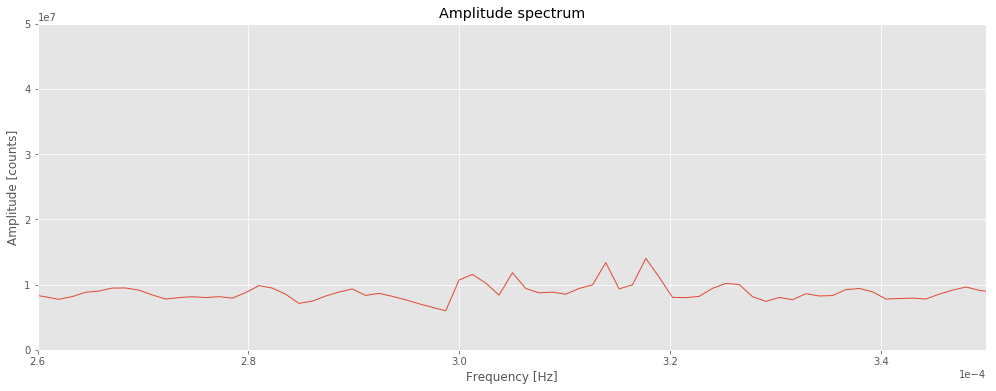

In [13]:
#check the waveforms for mode analysis
sta_list_check=pd.read_csv('stationlist.csv', sep=',',header=None)
sta_fname=sta_list_check[1]
directory = "./data"
#directory = ".\data" # for windows

i = 1
st = read (path.join(directory, sta_fname[i]),header=None )
st_copy = st.copy()
tr = st_copy[0].data
npts= st_copy[0].stats.npts
fsamp = 1                       # sampling rate
dt = 1/fsamp                    # time step
fNy = fsamp / 2.0  

# Taper
taper_percentage = 0.005                        # Percentage of tapering applied to signal
taper = cosine_taper(npts,taper_percentage)     
tr_taper = tr * taper  

#Detrend
tr_detrend = detrend(tr_taper, 'linear')
tr_fft = np.fft.rfft(tr_detrend)
freq = np.linspace(0, fNy, len(tr_fft))

#figure size
plt.rcParams['figure.figsize'] = 17, 6

plt.plot(freq, abs(tr_fft), lw=1)    
plt.title('Amplitude spectrum')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Amplitude [counts]')
plt.xlim (0.26E-3, 0.35E-3)
plt.ylim (0, 0.5E8)
plt.rcParams['figure.figsize'] = 15,7
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
plt.show()

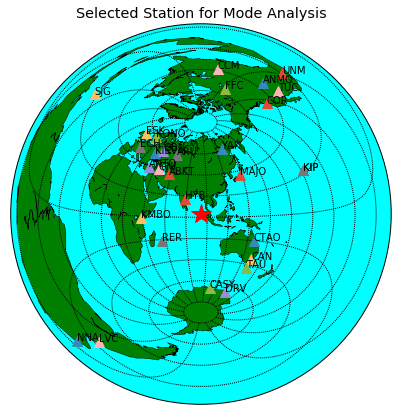

In [14]:
sta_list=pd.read_csv('stationlist_mode_analysis1.csv', sep=',',header=None)
sta_code=np.array(sta_list[2])
sta_lat=np.array(sta_list[6])
sta_lon=np.array(sta_list[7])

lon_epic = 94.26; lat_epic = 3.09
m = Basemap(projection='aeqd',lat_0=lat_epic,lon_0=lon_epic)

# fill background.
m.drawmapboundary(fill_color='aqua')
# draw coasts and fill continents.
m.drawcoastlines(linewidth=0.5)
m.fillcontinents(color='green',lake_color='aqua')
# 20 degree graticule.
m.drawparallels(np.arange(-80,81,20))
m.drawmeridians(np.arange(-180,180,20))

# plot epicenter at the center.
xepic, yepic = m(lon_epic, lat_epic)
m.plot([xepic],[yepic],'r*', markersize=20.0)

#plot the station
xsta, ysta=m(sta_lon,sta_lat)
for i in range(len(sta_lat)):
    b= m.plot(xsta[i],ysta[i],'^', markersize=10.0)
    plt.text(xsta[i], ysta[i], sta_code[i])
    
#figure size
plt.rcParams['figure.figsize'] = 10,10

# draw the title.
plt.title('Selected Station for Mode Analysis')
plt.show()

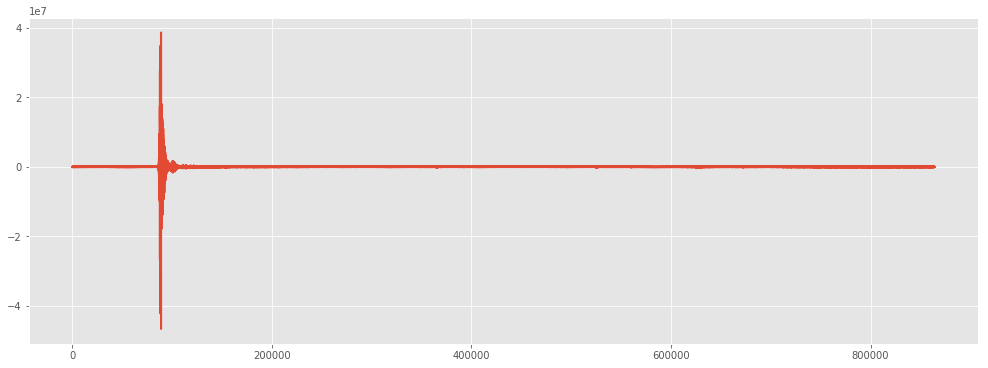

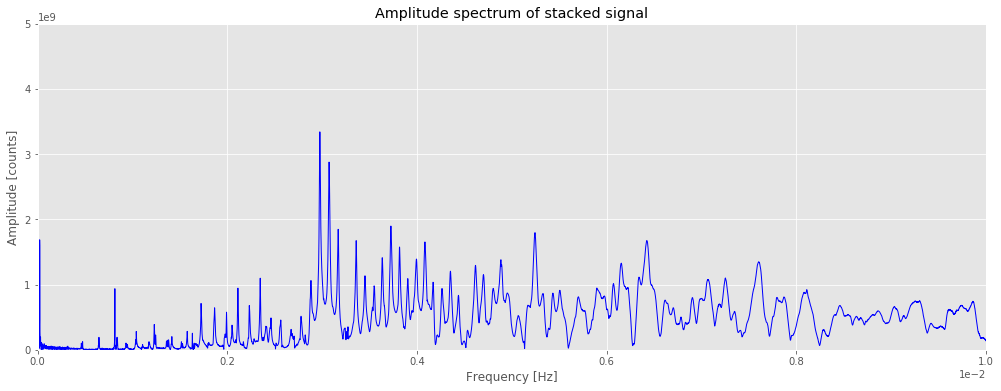

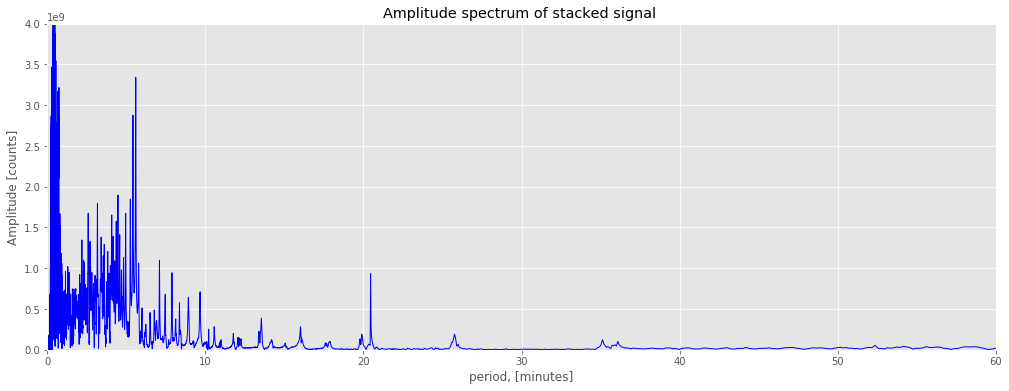

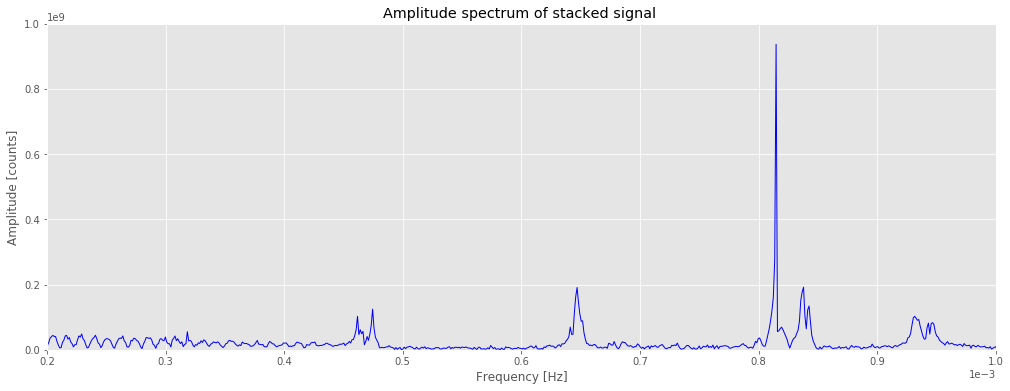

In [15]:
# plotting parameter
plt.rcParams['figure.figsize'] = 17,6
plt.rcParams['lines.linewidth'] = 2

sta_fname=np.array(sta_list[1])
tr_fname=np.array(sta_list[1])

sta_fname=np.array(sta_list[1])
tr_fname=np.array(sta_list[1])

nsec=10*24*60*60 #convert 10 days into s 
y=np.zeros(nsec)
e=Stream()

for i in range (len(sta_fname)):
    a = read (path.join(directory, sta_fname[i]),header=None )
    c = Trace(a[0].data)
    t = c.stats.starttime
    d = c.trim(t,t+nsec-1, pad=True, fill_value=0)
    e = e.append(d)
    tr_stack = np.sum([tr.data for tr in e], axis=0)

plt.plot(tr_stack)
plt.show()

#spectral analysis for the stacked waveforms
npts1 = nsec                     # number of samples

# Taper
taper1 = cosine_taper(npts1,taper_percentage)
stack_taper = tr_stack * taper1                             # Taper signal

# Detrend Signal
stack_detrend = detrend(stack_taper, 'linear')

# Frequency Domain
stack_fft = np.fft.rfft(stack_detrend) 

freq = np.linspace(0, fNy, len(stack_fft))         # Frequency axis for plotting
period = (1/freq)/60                           # Period in minutes for axis for plotting

# Plot the full spectrum of the signal
plt.plot(freq, abs(stack_fft), 'b', lw=1) 
plt.title('Amplitude spectrum of stacked signal')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Amplitude [counts]')
plt.xlim (0, 10E-3)
plt.ylim (0, 0.5E10)
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
plt.show()

# Plot the spectrum of the signal that zoomed-in on the low frequency
plt.plot(period, abs(stack_fft), 'b', lw=1) 
plt.title('Amplitude spectrum of stacked signal ')
plt.xlabel('period, [minutes]')
plt.ylabel('Amplitude [counts]')
plt.ylim (0, 0.4E10)
plt.xlim(0, 60)
plt.show()

#Plot the full spectrum of the signal with zeros padding
plt.plot(freq, abs(stack_fft), 'b', lw=1) 
plt.title('Amplitude spectrum of stacked signal ')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Amplitude [counts]')
plt.ylim (0, 1.0E9)
plt.xlim (0.2E-3, 1E-3)
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
plt.show()

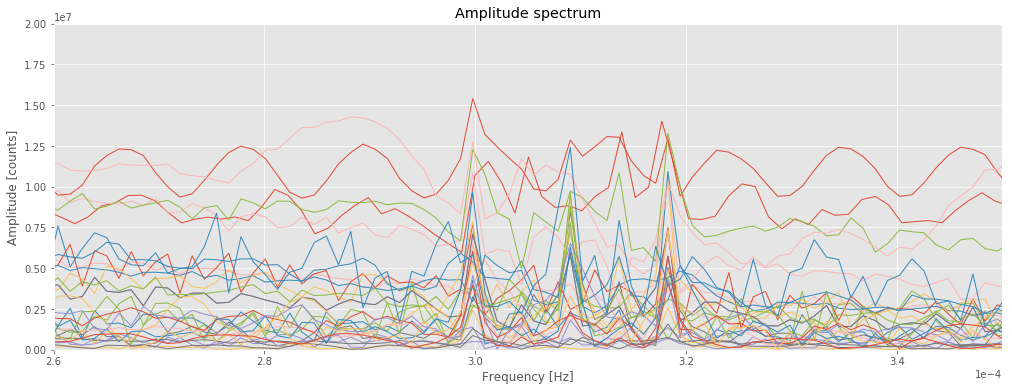

In [16]:
sta_fname=np.array(sta_list[1])
tr_fname=np.array(sta_list[1])

fsamp = 1                       # sampling rate
dt = 1/fsamp                    # time step
fNy = fsamp / 2.0  
taper_percentage = 0.005
plt.rcParams['figure.figsize'] = 17,6

for i in range (len(sta_fname)):
    st1 = read (path.join(directory, sta_fname[i]),header=None )
    st1_copy = st1.copy()
    tr1 = st1_copy[0].data
    npts2=st1_copy[0].stats.npts
    taper2 = cosine_taper(npts2,taper_percentage)
    tr1_taper = tr1 * taper2  
    tr1_detrend = detrend(tr1_taper, 'linear')
    tr1_fft = np.fft.rfft(tr1_detrend)
    freq = np.linspace(0, fNy, len(tr1_fft))
    plt.plot(freq, abs(tr1_fft), lw=1) 
    
plt.title('Amplitude spectrum')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Amplitude [counts]')
plt.xlim (0.26E-3, 0.35E-3)
plt.ylim (0, 0.2E8)
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
plt.show()